In [1]:
import pandas as pd
import numpy as np
import copy
import ast
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) # display all columns

In [2]:
df_standby = pd.read_csv('aggregated_reviews_meta.csv')
df_standby.drop(columns=['Unnamed: 0'], inplace=True)
df = df_standby.copy()

In [3]:
df.describe()

,rating,title_len,vote,summary_len,category_count,review_count,verified_true_ratio,also_buy_count,also_view_count,price,rankElectronics,review_text_len,percentage_positive
count,7097.000000,7097.000000,5541.000000,7097.000000,7097.000000,7097.000000,7097.000000,7097.000000,7097.000000,7097.000000,7.097000e+03,7097.000000,7097.000000
mean,4.194383,15.981260,6.708170,4.802311,44.330703,44.330703,0.895662,44.330703,44.330703,30.811112,1.125403e+05,65.787204,0.791165
std,0.558064,9.565567,9.123288,3.864708,117.437481,117.437481,0.161614,117.437481,117.437481,110.675561,1.250601e+05,60.259163,0.167163
min,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.370000,5.600000e+01,1.000000,0.000000
25%,3.900000,9.000000,3.000000,2.000000,7.000000,7.000000,0.861111,7.000000,7.000000,5.070000,2.805300e+04,29.100000,0.700000
50%,4.285714,13.000000,4.800000,3.000000,14.000000,14.000000,0.954058,14.000000,14.000000,9.990000,7.421900e+04,47.923077,0.818182
75%,4.600000,21.000000,7.888889,6.000000,35.000000,35.000000,1.000000,35.000000,35.000000,19.710000,1.540570e+05,80.878049,0.909091
max,5.000000,108.000000,456.692308,33.000000,2484.000000,2484.000000,1.000000,2484.000000,2484.000000,3502.850000,1.500170e+06,966.857143,1.000000


In [4]:
df.head(3)

,asin,rating,title,title_len,vote,summary_len,category_count,review_count,verified_true_ratio,also_buy_count,also_view_count,brand,main_cat,price,rankElectronics,review_text_len,percentage_positive
0,B00000J1EI,4.428571,"Maxell GX-MP 120 Camcorder tapes, 3 Pack",7,NaN,2,7,7,1.0,7,7,Maxell,Home Audio & Theater,35.89,15985.0,7.571429,0.857143
1,B00000JD3C,4.333333,Sony 3MC-60B Microcassette - 3 Pack,6,7.0,2,18,18,1.0,18,18,Sony,Home Audio & Theater,8.95,8344.0,21.111111,0.722222
2,B00000JD4T,4.000000,ETON G2000A AM/FM Shortwave Radio (Discontinue...,8,3.0,5,2,2,0.0,2,2,Eton,Home Audio & Theater,7.69,186267.0,149.500000,1.000000


In [5]:
df.dtypes

asin                    object
rating                 float64
title                   object
title_len                int64
vote                   float64
summary_len              int64
category_count           int64
review_count             int64
verified_true_ratio    float64
also_buy_count           int64
also_view_count          int64
brand                   object
main_cat                object
price                  float64
rankElectronics        float64
review_text_len        float64
percentage_positive    float64
dtype: object

## 1. Feature Scaling

In [6]:
# do encoding for categorical variable
from category_encoders import TargetEncoder

new_df = df

encoder = TargetEncoder()
new_df['brand_encode'] = encoder.fit_transform(new_df['brand'], new_df['rankElectronics'])

encoder = TargetEncoder()
new_df['main_cat_encode'] = encoder.fit_transform(new_df['main_cat'], new_df['rankElectronics'])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [7]:
new_df

,asin,rating,title,title_len,vote,summary_len,category_count,review_count,verified_true_ratio,also_buy_count,also_view_count,brand,main_cat,price,rankElectronics,review_text_len,percentage_positive,brand_encode,main_cat_encode
0,B00000J1EI,4.428571,"Maxell GX-MP 120 Camcorder tapes, 3 Pack",7,NaN,2,7,7,1.000000,7,7,Maxell,Home Audio & Theater,35.89,15985.0,7.571429,0.857143,94099.489090,104707.783648
1,B00000JD3C,4.333333,Sony 3MC-60B Microcassette - 3 Pack,6,7.000000,2,18,18,1.000000,18,18,Sony,Home Audio & Theater,8.95,8344.0,21.111111,0.722222,138006.442231,104707.783648
2,B00000JD4T,4.000000,ETON G2000A AM/FM Shortwave Radio (Discontinue...,8,3.000000,5,2,2,0.000000,2,2,Eton,Home Audio & Theater,7.69,186267.0,149.500000,1.000000,134386.430817,104707.783648
3,B00000JMRV,4.200000,Grundig M100 Portable Radio (Discontinued by M...,7,NaN,5,5,5,0.400000,5,5,Eton,Home Audio & Theater,7.67,142184.0,40.600000,0.600000,134386.430817,104707.783648
4,B00000JMRX,2.500000,ETON YB300PE AM/FM Shortwave Radio (Discontinu...,8,NaN,2,2,2,0.000000,2,2,Eton,Home Audio & Theater,7.69,509371.0,259.500000,0.000000,134386.430817,104707.783648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7092,B01HGME54Q,4.600000,Mini Skater Circle Ethernet Nylon Wire Cable C...,15,NaN,2,5,5,1.000000,5,5,Mini Skater,Home Audio & Theater,6.50,42825.0,15.200000,0.800000,112540.283359,104707.783648
7093,B01HGYMEKQ,4.375000,Yamaha BD-S681 Blu-ray Disc Player,5,6.142857,6,8,8,1.000000,8,8,Yamaha Audio,All Electronics,13.18,21487.0,83.625000,0.875000,84097.771930,130121.910043
7094,B01HI829TG,3.666667,Camecho Wireless Car Vehicle Backup Camera Sys...,26,3.000000,12,9,9,1.000000,9,9,Camecho,Car Electronics,4.96,50724.0,11.333333,0.888889,76149.442280,107472.849838
7095,B01HIL1XZY,3.812500,Studebaker 4330975871 Black Retro SB2000 Repli...,12,15.222222,2,16,16,1.000000,16,16,Studebaker,All Electronics,1.86,17509.0,83.000000,0.750000,61249.371860,130121.910043


## 2. Model Selection
We will be using four models for prediction of sales rank. The following are as shown:<br>
   1. Decision Tree Regressor
   2. Keras Regression-Based Neural Network
   3. Random Forest Regression
   4. XGBoost Regressor
   5. Lasso Regression
   6. Ridge Regression

### Train Test Split

In [8]:
sales_df = new_df.copy()

In [9]:
sales_df['normRankElectronics'] = np.array(sales_df.rankElectronics.rank())

In [10]:
sales_df.head()

,asin,rating,title,title_len,vote,summary_len,category_count,review_count,verified_true_ratio,also_buy_count,also_view_count,brand,main_cat,price,rankElectronics,review_text_len,percentage_positive,brand_encode,main_cat_encode,normRankElectronics
0,B00000J1EI,4.428571,"Maxell GX-MP 120 Camcorder tapes, 3 Pack",7,NaN,2,7,7,1.0,7,7,Maxell,Home Audio & Theater,35.89,15985.0,7.571429,0.857143,94099.489090,104707.783648,1071.5
1,B00000JD3C,4.333333,Sony 3MC-60B Microcassette - 3 Pack,6,7.0,2,18,18,1.0,18,18,Sony,Home Audio & Theater,8.95,8344.0,21.111111,0.722222,138006.442231,104707.783648,547.0
2,B00000JD4T,4.000000,ETON G2000A AM/FM Shortwave Radio (Discontinue...,8,3.0,5,2,2,0.0,2,2,Eton,Home Audio & Theater,7.69,186267.0,149.500000,1.000000,134386.430817,104707.783648,5782.0
3,B00000JMRV,4.200000,Grundig M100 Portable Radio (Discontinued by M...,7,NaN,5,5,5,0.4,5,5,Eton,Home Audio & Theater,7.67,142184.0,40.600000,0.600000,134386.430817,104707.783648,5131.0
4,B00000JMRX,2.500000,ETON YB300PE AM/FM Shortwave Radio (Discontinu...,8,NaN,2,2,2,0.0,2,2,Eton,Home Audio & Theater,7.69,509371.0,259.500000,0.000000,134386.430817,104707.783648,6987.0


In [11]:
# Train-Test Split
X = sales_df.drop(['rankElectronics', 'asin', 'title', 'brand', 'main_cat', 'normRankElectronics'], axis=1)
y = sales_df.normRankElectronics

X['vote'] = X['vote'].fillna(0) # to replace NaN with 0

# Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4222)

X_train[["rating", "title_len", "vote", "summary_len", "category_count","review_count","verified_true_ratio", "also_buy_count", "also_view_count", "price", "review_text_len", "percentage_positive"]] = scaler.fit_transform(X_train[["rating", "title_len", "vote", "summary_len", "category_count","review_count","verified_true_ratio", "also_buy_count", "also_view_count", "price", "review_text_len", "percentage_positive"]])
X_test[["rating", "title_len", "vote", "summary_len", "category_count","review_count","verified_true_ratio", "also_buy_count", "also_view_count", "price", "review_text_len", "percentage_positive"]] = scaler.transform(X_test[["rating", "title_len", "vote", "summary_len", "category_count","review_count","verified_true_ratio", "also_buy_count", "also_view_count", "price", "review_text_len", "percentage_positive"]])

<ipython-input-11-e2f96b65f90c>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[["rating", "title_len", "vote", "summary_len", "category_count","review_count","verified_true_ratio", "also_buy_count", "also_view_count", "price", "review_text_len", "percentage_positive"]] = scaler.fit_transform(X_train[["rating", "title_len", "vote", "summary_len", "category_count","review_count","verified_true_ratio", "also_buy_count", "also_view_count", "price", "review_text_len", "percentage_positive"]])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [12]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
import math

#models is a list of the fitted models, model_names is list of model names

def model_performance(models, model_names):
    #create empty df with col names
    df = pd.DataFrame(columns = ['Model', 'Train: Rsquare', 'Test: Rsquare', 'Train: MAE', 'Test: MAE', 'Train: RMSE', 'Test: RMSE', 'Train: MAPE', 'Test: MAPE'])
    
    for n, model in enumerate(models):
        model.fit(X_train, y_train)
        #prepare values for model
        y_train_pred = model.predict(X_train)
        y_pred = model.predict(X_test)

        name = model_names[n] 
        rsquare_train = r2_score(y_train, y_train_pred)
        mae_train = mean_absolute_error(y_train, y_train_pred)
        rmse_train = math.sqrt(mean_squared_error(y_train, y_train_pred))
        
        rsquare_test = r2_score(y_test, y_pred)
        mae_test = mean_absolute_error(y_test, y_pred)
        rmse_test = math.sqrt(mean_squared_error(y_test, y_pred))
        
        mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
        mape_test = mean_absolute_percentage_error(y_test, y_pred)

        #append row to df
        df = df.append({'Model' 
                        : name, 'Train: Rsquare' : rsquare_train, 'Test: Rsquare' : rsquare_test, 'Train: MAE': mae_train, 'Test: MAE' : mae_test, 'Train: RMSE': rmse_train,
                         'Test: RMSE' : rmse_test, 'Train: MAPE': mape_train, 'Test: MAPE': mape_test}, 
                    ignore_index = True)
            
    return df.set_index('Model').transpose()

In [13]:
import pickle
import os

directory = "pickle/"
def storeData(pickle_name, pickle_obj):     
    # Its important to use binary mode 
    dbfile = open(pickle_name, 'ab') 
    # source, destination 
    pickle.dump(pickle_obj, dbfile)                      
    dbfile.close() 
    
def loadData(pickle_name): 
    # for reading also binary mode is important 
    dbfile = open(pickle_name, 'rb')      
    db = pickle.load(dbfile) 
    dbfile.close() 
    return db    

### EDA for New Aggregated Datasets

In [21]:
sales_df.corr()

,rating,title_len,vote,summary_len,category_count,review_count,verified_true_ratio,also_buy_count,also_view_count,price,rankElectronics,review_text_len,percentage_positive,brand_encode,main_cat_encode,normRankElectronics
rating,1.000000,0.038023,-0.053765,-0.054820,0.012352,0.012352,0.217329,0.012352,0.012352,-0.035204,-0.169312,-0.183171,0.832252,-0.138741,-0.104508,-0.181727
title_len,0.038023,1.000000,-0.086152,-0.025119,-0.040599,-0.040599,0.163360,-0.040599,-0.040599,-0.069736,-0.125692,-0.178213,0.043582,-0.151053,-0.101405,-0.116545
vote,-0.053765,-0.086152,1.000000,0.029918,0.274025,0.274025,-0.080374,0.274025,0.274025,0.059756,-0.066106,0.155492,-0.065714,-0.023198,0.080236,-0.098310
summary_len,-0.054820,-0.025119,0.029918,1.000000,0.003524,0.003524,-0.110160,0.003524,0.003524,0.040118,0.001437,0.160875,-0.059221,-0.006088,0.000646,-0.003599
category_count,0.012352,-0.040599,0.274025,0.003524,1.000000,1.000000,0.028026,1.000000,1.000000,-0.016024,-0.183956,0.014331,0.001031,-0.072784,0.082850,-0.267104
review_count,0.012352,-0.040599,0.274025,0.003524,1.000000,1.000000,0.028026,1.000000,1.000000,-0.016024,-0.183956,0.014331,0.001031,-0.072784,0.082850,-0.267104
verified_true_ratio,0.217329,0.163360,-0.080374,-0.110160,0.028026,0.028026,1.000000,0.028026,0.028026,-0.177641,-0.233362,-0.555764,0.195308,-0.108544,-0.094264,-0.205136
also_buy_count,0.012352,-0.040599,0.274025,0.003524,1.000000,1.000000,0.028026,1.000000,1.000000,-0.016024,-0.183956,0.014331,0.001031,-0.072784,0.082850,-0.267104
also_view_count,0.012352,-0.040599,0.274025,0.003524,1.000000,1.000000,0.028026,1.000000,1.000000,-0.016024,-0.183956,0.014331,0.001031,-0.072784,0.082850,-0.267104
price,-0.035204,-0.069736,0.059756,0.040118,-0.016024,-0.016024,-0.177641,-0.016024,-0.016024,1.000000,0.090475,0.247024,-0.044340,0.037108,0.017486,0.096827


<AxesSubplot:>

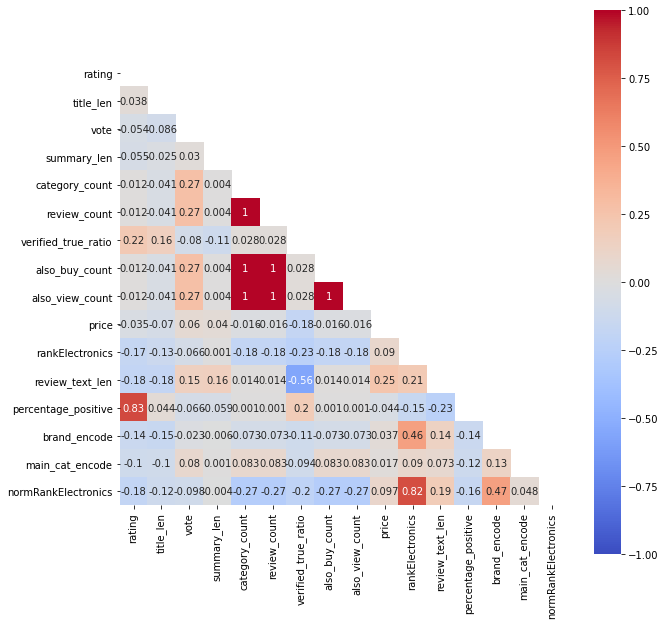

In [22]:
# Checking correlations of the features

corr = round(sales_df.corr(), 3)
fig, ax = plt.subplots(figsize=(10,10))  
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, cmap='coolwarm', mask=mask, annot=True, vmin=-1, vmax=1, center= 0, square=True)

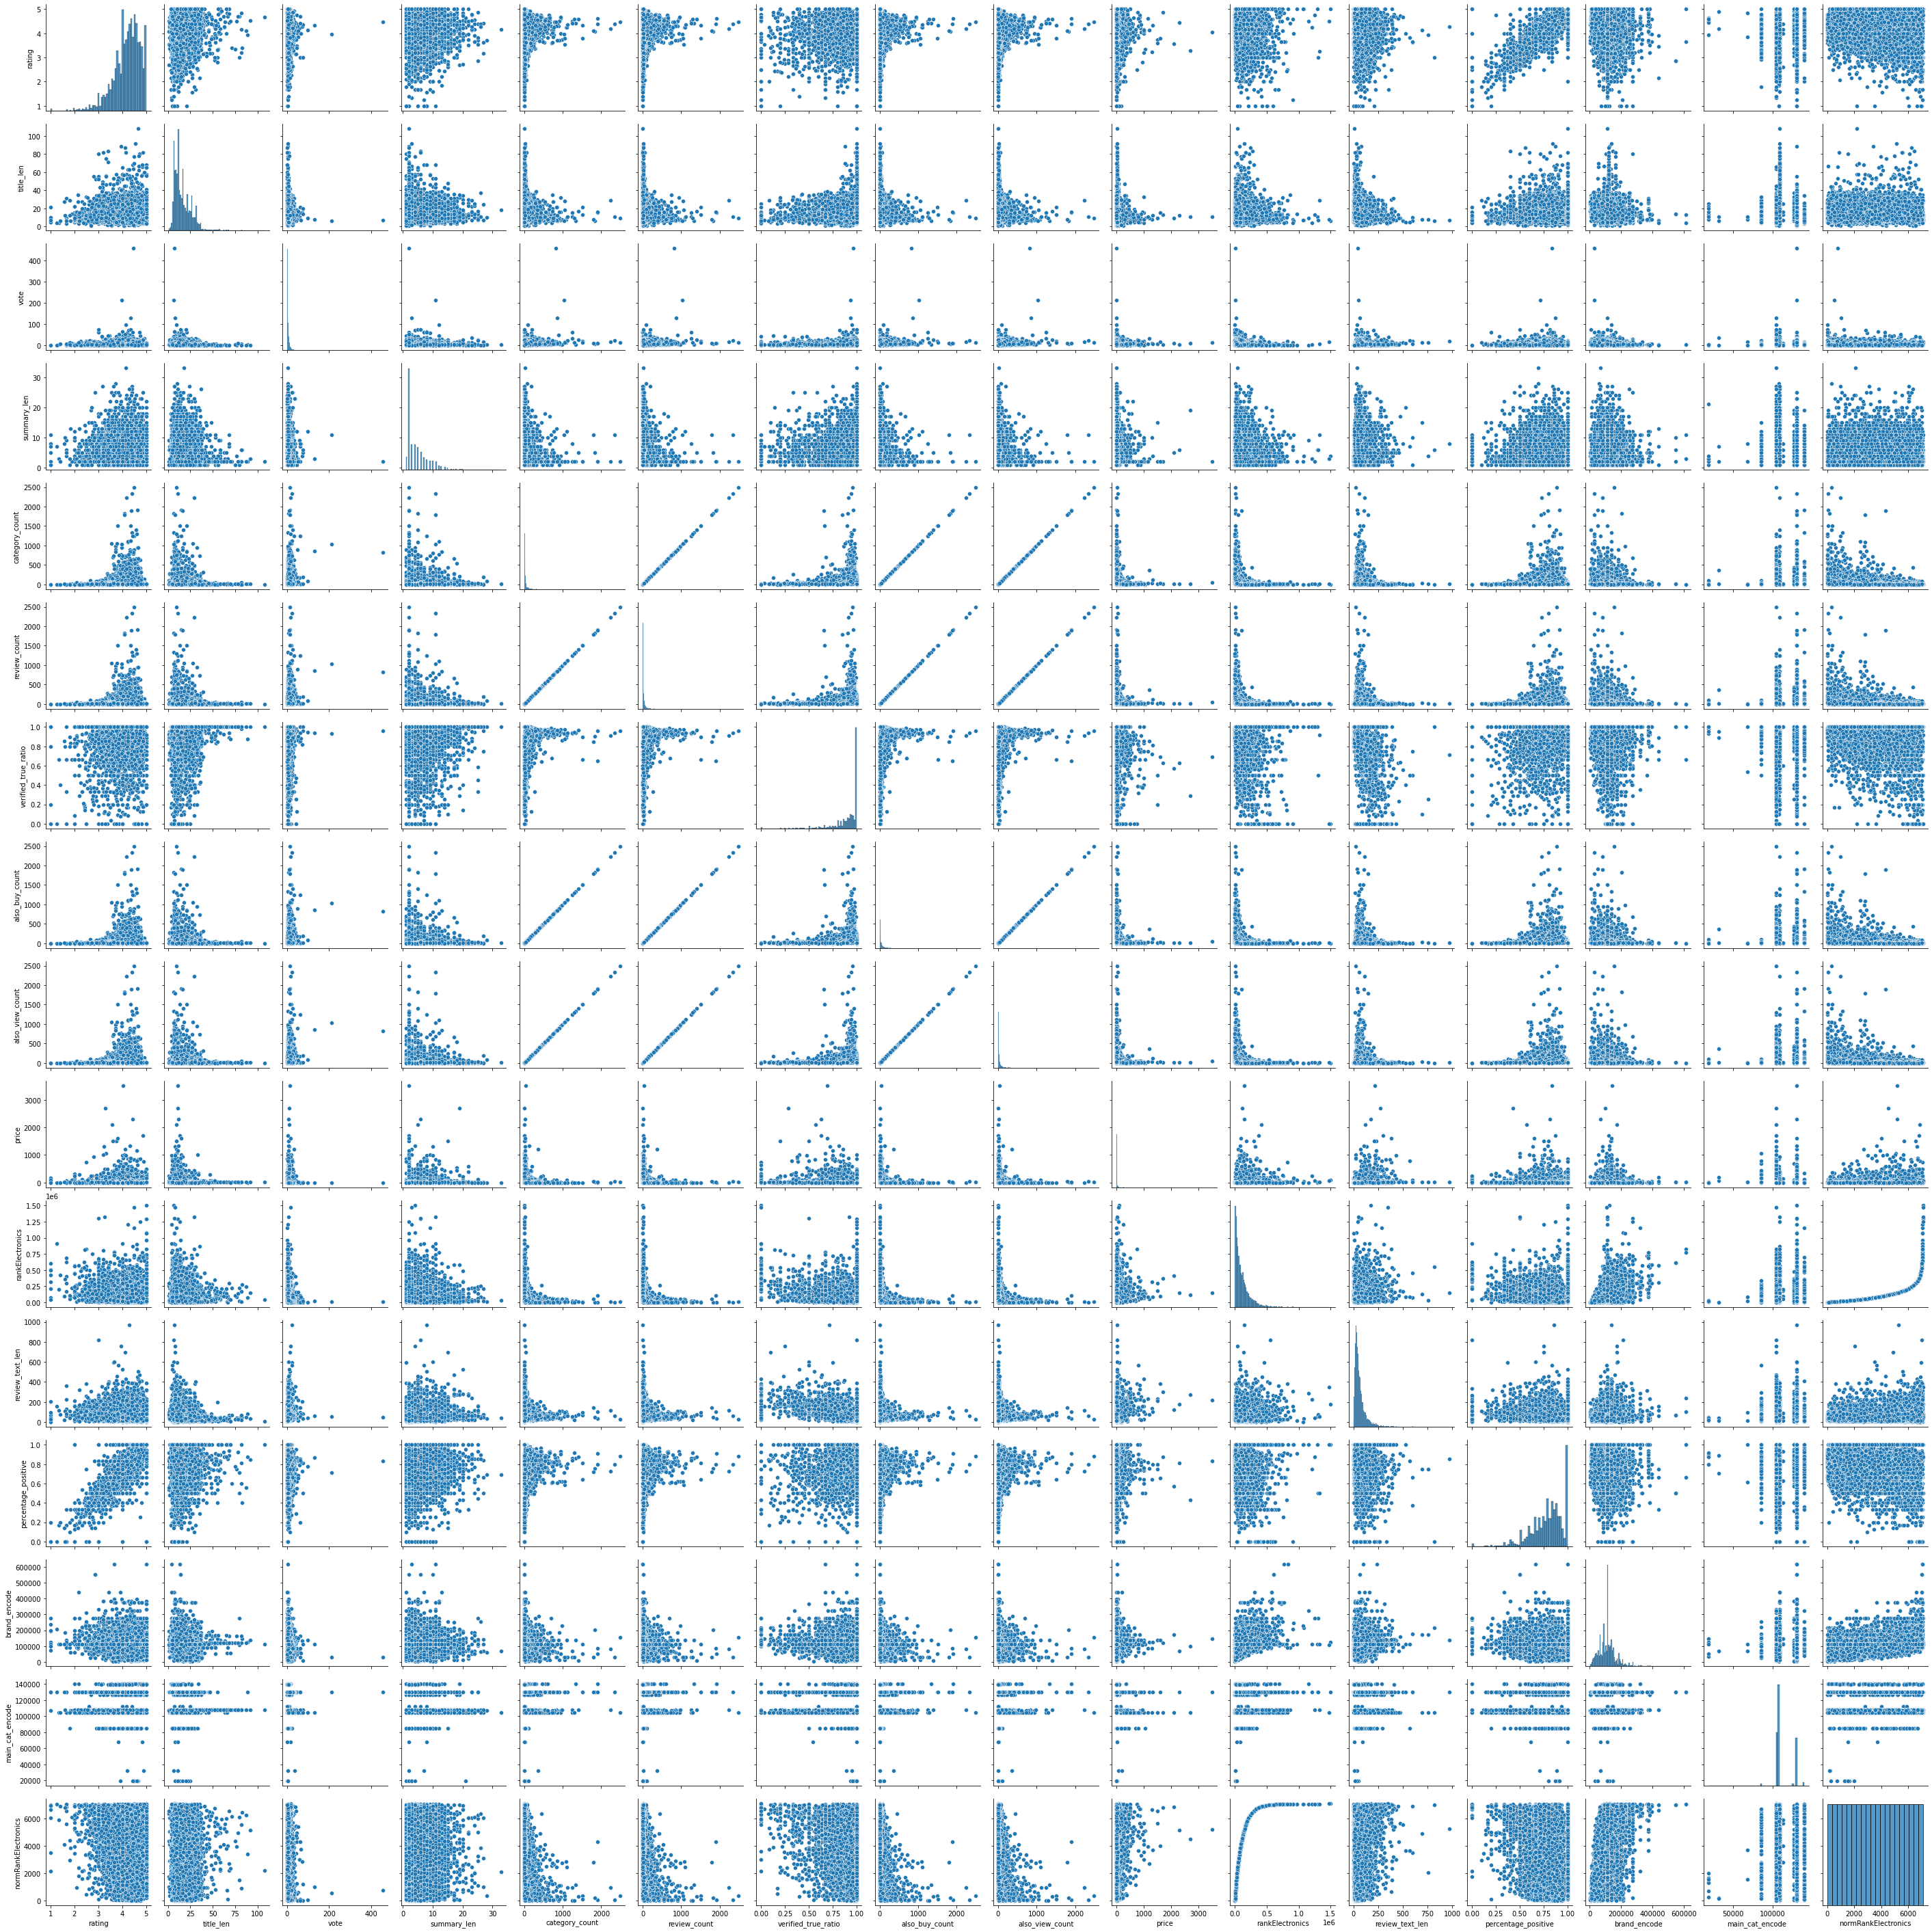

In [23]:
sns.pairplot(sales_df)

### DecisionTreeRegressor

reference links:<br>
1. https://machinelearningmastery.com/calculate-feature-importance-with-python/
2. https://www.kaggle.com/marklvl/decision-tree-regressor-on-bike-sharing-dataset

In [14]:
### DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtr.fit(X_train,y_train)
print("R-Squared on train dataset={}".format(dtr.score(X_test,y_test)))

dtr.fit(X_test,y_test)   
print("R-Squaredon test dataset={}".format(dtr.score(X_test,y_test)))

model_performance([dtr], ["dtr"])


R-Squared on train dataset=0.35045676708629536
R-Squaredon test dataset=0.3889864074788748


Model,dtr
Train: Rsquare,0.395070
Test: Rsquare,0.350457
Train: MAE,1320.257786
Test: MAE,1346.204102
Train: RMSE,1597.611605
Test: RMSE,1638.108578
Train: MAPE,2.235177
Test: MAPE,2.040968


In [15]:
# Hyperparameter tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

pickle_name = "DecisionTreeRegressorGridSearch"

if pickle_name in os.listdir(directory):
    print('loadingData from directory instead of running')
    dtr_tuned = loadData(directory + pickle_name)
else:
    dtr_tuned = GridSearchCV(dtr, param_grid, cv=5)
    storeData(directory + pickle_name, dtr_tuned)

model_performance([dtr, dtr_tuned], ["dtr", "dtr_tuned"])

loadingData from directory instead of running


Model,dtr,dtr_tuned
Train: Rsquare,0.395070,0.475400
Test: Rsquare,0.350457,0.379220
Train: MAE,1320.257786,1207.414089
Test: MAE,1346.204102,1287.858640
Train: RMSE,1597.611605,1487.759731
Test: RMSE,1638.108578,1601.428559
Train: MAPE,2.235177,1.730753
Test: MAPE,2.040968,1.517224


In [16]:
print("R-Squared::{}".format(dtr_tuned.best_score_))
print("Best Hyperparameters::\n{}".format(dtr_tuned.best_params_))

R-Squared::0.4089412967179662
Best Hyperparameters::
{'criterion': 'mse', 'max_depth': 6, 'max_leaf_nodes': 100, 'min_samples_leaf': 40, 'min_samples_split': 10}


In [17]:
df_dt_grid_search = pd.DataFrame(data=dtr_tuned.cv_results_)
df_dt_grid_search.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009062,0.001795,0.002417,0.000612,mse,2,5,20,10,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",0.303281,0.217046,0.274726,0.291571,0.283538,0.274033,0.030004,91
1,0.007212,0.000480,0.001704,0.000101,mse,2,5,20,20,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",0.303281,0.217046,0.274726,0.291571,0.283538,0.274033,0.030004,91
2,0.007202,0.000254,0.002175,0.000342,mse,2,5,20,40,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",0.303281,0.217046,0.274726,0.291571,0.283538,0.274033,0.030004,91
3,0.007513,0.000517,0.002161,0.000273,mse,2,5,40,10,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",0.303281,0.217046,0.274726,0.291571,0.283538,0.274033,0.030004,91
4,0.007392,0.000268,0.001990,0.000254,mse,2,5,40,20,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",0.303281,0.217046,0.274726,0.291571,0.283538,0.274033,0.030004,91


[Text(0.5, 1.0, 'Effect of Depth and Leaf Nodes on Model Performance')]

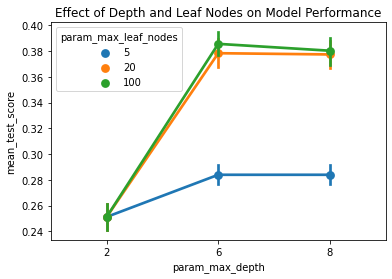

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,ax = plt.subplots()
sns.pointplot(data=df_dt_grid_search[['mean_test_score',
                           'param_max_leaf_nodes',
                           'param_max_depth']],
             y='mean_test_score',x='param_max_depth',
             hue='param_max_leaf_nodes',ax=ax)
ax.set(title="Effect of Depth and Leaf Nodes on Model Performance")

In [26]:
print(dtr_tuned.best_estimator_.get_params())

dtr_tuned_model = DecisionTreeRegressor(ccp_alpha=0.0,
 criterion='mse',
 max_depth= 6,
 max_features= None,
 max_leaf_nodes= 100,
 min_impurity_decrease= 0.0,
 min_impurity_split= None,
 min_samples_leaf= 40,
 min_samples_split= 10,
 min_weight_fraction_leaf= 0.0,
 random_state= None,
 splitter= 'best')

{'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': 100, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 40, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [141]:
dtr_tuned_model

DecisionTreeRegressor(max_depth=6, max_leaf_nodes=100, min_samples_leaf=40,
                      min_samples_split=10)

In [156]:
X_columns = X_train.columns
list(X_columns)

['rating',
 'title_len',
 'vote',
 'summary_len',
 'category_count',
 'review_count',
 'verified_true_ratio',
 'also_buy_count',
 'also_view_count',
 'price',
 'review_text_len',
 'percentage_positive',
 'brand_encode',
 'main_cat_encode']

Feature: rating, Score: 0.012043195437533407
Feature: title_len, Score: 0.002365515012640536
Feature: vote, Score: 0.019241957028793118
Feature: summary_len, Score: 0.0007839178610837202
Feature: category_count, Score: 0.342563878966616
Feature: review_count, Score: 0.030452521212581015
Feature: verified_true_ratio, Score: 0.0251529631821921
Feature: also_buy_count, Score: 0.06502463682019433
Feature: also_view_count, Score: 0.00319201457867641
Feature: price, Score: 0.00970280860374017
Feature: review_text_len, Score: 0.052983096205588234
Feature: percentage_positive, Score: 0.008770250078015329
Feature: brand_encode, Score: 0.421599771569252
Feature: main_cat_encode, Score: 0.006123473443093547


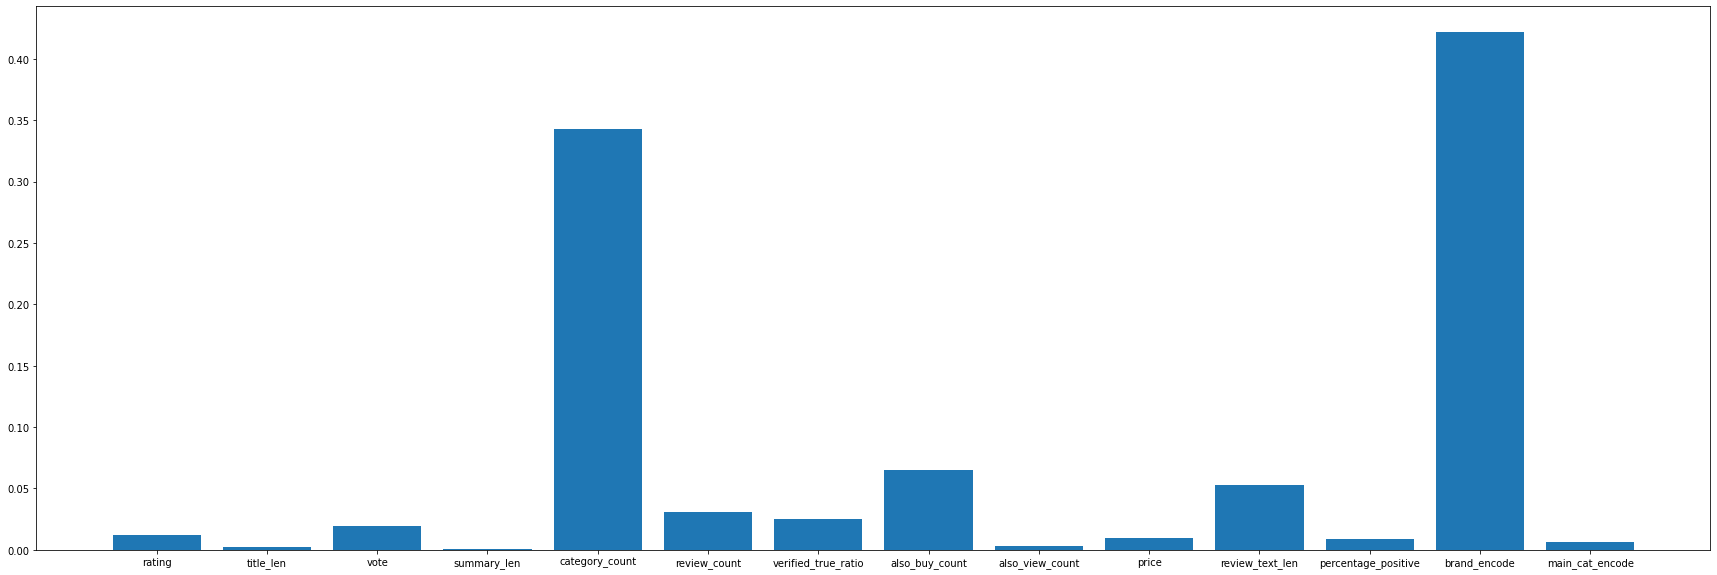

In [159]:
### Feature Importance of Decision Tree
dtr_tuned_model.fit(X_train, y_train)
# get importance
importance = dtr_tuned_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print(f"Feature: {list(X_columns)[i]}, Score: {v}")
# plot feature importance
plt.figure(figsize=(30,10)) 
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))], X_train.columns)
plt.show()

### Neural Network
reference link:
1. https://datascienceplus.com/keras-regression-based-neural-networks/

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

In [137]:
nn = Sequential()
nn.add(Dense(15,
                activation = 'relu',
                input_shape = (14, ),
                activity_regularizer = regularizers.l2(1e-5)))
nn.add(Dropout(0.50))
nn.add(Dense(113440,
                activation = 'relu', 
                activity_regularizer = regularizers.l2(1e-5)))
nn.add(Dropout(0.50))
nn.add(Dense(1, activation = 'relu'))
nn.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 15)                225       
_________________________________________________________________
dropout_20 (Dropout)         (None, 15)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 113440)            1815040   
_________________________________________________________________
dropout_21 (Dropout)         (None, 113440)            0         
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 113441    
Total params: 1,928,706
Trainable params: 1,928,706
Non-trainable params: 0
_________________________________________________________________


In [138]:
nn.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history = nn.fit(X_train, y_train, epochs=150, batch_size=16, verbose=1, validation_split=0.2)

Epoch 1/150
267/267 [==============================] - 10s 39ms/step - loss: 20707154.0000 - mse: 20595644.0000 - mae: 3655.4019 - val_loss: 16989686.0000 - val_mse: 16954206.0000 - val_mae: 3561.4666
Epoch 2/150
267/267 [==============================] - 11s 42ms/step - loss: 16890274.0000 - mse: 16812078.0000 - mae: 3550.4333 - val_loss: 16987564.0000 - val_mse: 16954206.0000 - val_mae: 3561.4666
Epoch 3/150
267/267 [==============================] - 12s 43ms/step - loss: 16883546.0000 - mse: 16812082.0000 - mae: 3550.4326 - val_loss: 16985490.0000 - val_mse: 16954206.0000 - val_mae: 3561.4666
Epoch 4/150
267/267 [==============================] - 10s 38ms/step - loss: 16878146.0000 - mse: 16812086.0000 - mae: 3550.4331 - val_loss: 16983704.0000 - val_mse: 16954206.0000 - val_mae: 3561.4666
Epoch 5/150
267/267 [==============================] - 10s 37ms/step - loss: 16868160.0000 - mse: 16812092.0000 - mae: 3550.4343 - val_loss: 16981862.0000 - val_mse: 16954206.0000 - val_mae: 3561.

267/267 [==============================] - 9s 34ms/step - loss: 3716207.2500 - mse: 3715323.7500 - mae: 1624.1140 - val_loss: 7217383.5000 - val_mse: 7217021.0000 - val_mae: 2212.8472
Epoch 84/150
267/267 [==============================] - 10s 36ms/step - loss: 3845050.5000 - mse: 3844252.2500 - mae: 1651.1678 - val_loss: 6074463.0000 - val_mse: 6074052.0000 - val_mae: 2030.4580
Epoch 85/150
267/267 [==============================] - 10s 37ms/step - loss: 3842190.2500 - mse: 3841474.0000 - mae: 1655.3234 - val_loss: 6717849.0000 - val_mse: 6717507.0000 - val_mae: 2133.9248
Epoch 86/150
267/267 [==============================] - 10s 37ms/step - loss: 3812582.2500 - mse: 3811951.2500 - mae: 1651.0538 - val_loss: 5570705.5000 - val_mse: 5570294.0000 - val_mae: 1943.4678
Epoch 87/150
267/267 [==============================] - 8s 31ms/step - loss: 3885311.0000 - mse: 3884804.0000 - mae: 1674.6360 - val_loss: 6651372.5000 - val_mse: 6651029.0000 - val_mae: 2122.3997
Epoch 88/150
267/267 [===

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


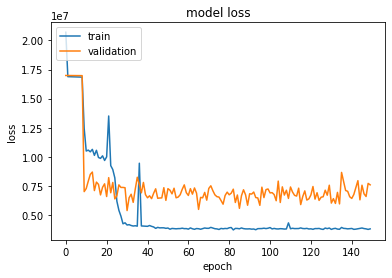

In [139]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [140]:
model_performance([nn], ["nn"])

167/167 [==============================] - 16s 95ms/step - loss: 3804066.5000 - mse: 3803798.7500 - mae: 1658.0231


Model,nn
Train: Rsquare,-0.734024
Test: Rsquare,-0.757709
Train: MAE,2218.863966
Test: MAE,2223.029395
Train: RMSE,2704.868383
Test: RMSE,2694.710926
Train: MAPE,1.551466
Test: MAPE,1.285659


In [35]:
from tensorflow.keras.optimizers import Adam

def create_model(learning_rate = 0.01, activation = 'relu'):
  
    # Create an Adam optimizer with the given learning rate
    opt = Adam(lr=learning_rate)
  
    # Create your binary classification model  
    model = Sequential()
    model.add(Dense(15, 
                    activation = activation,
                    input_shape = (14, ),
                    activity_regularizer = regularizers.l2(1e-5)))
    model.add(Dropout(0.50))
    model.add(Dense(113440,
                    activation = activation, 
                    activity_regularizer = regularizers.l2(1e-5)))
    model.add(Dropout(0.50))
    model.add(Dense(1, activation = activation))
# Compile the model
    model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
    return model

In [36]:
model = KerasRegressor(build_fn=create_model,
                       verbose=1)

params = {'activation': ["relu"],
          'batch_size': [16, 8], 
          'epochs': [200, 300, 500, 700],
          'learning_rate': [0.01, 0.05, 0.1]}

The RandomizedSearch CV will take approximately 3.5 hours to tune accordingly.

In [37]:
%%time

from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(model,
                                   param_distributions=params, n_jobs=-1)

random_search_results = random_search.fit(X_train, y_train)

Epoch 1/500
333/333 [==============================] - 0s 1ms/step - loss: 18157902.0000 - mse: 17773452.0000 - mae: 3576.8455
Epoch 2/500
333/333 [==============================] - 0s 1ms/step - loss: 17119048.0000 - mse: 16821690.0000 - mae: 3543.8528
Epoch 3/500
333/333 [==============================] - 1s 2ms/step - loss: 12617114.0000 - mse: 12417800.0000 - mae: 2889.4302
Epoch 4/500
333/333 [==============================] - 1s 2ms/step - loss: 6585110.5000 - mse: 6429839.5000 - mae: 2031.6511
Epoch 5/500
333/333 [==============================] - 1s 2ms/step - loss: 5374387.0000 - mse: 5240987.0000 - mae: 1840.9893
Epoch 6/500
333/333 [==============================] - 1s 2ms/step - loss: 5047981.5000 - mse: 4926550.0000 - mae: 1790.1376
Epoch 7/500
333/333 [==============================] - 1s 2ms/step - loss: 4814618.5000 - mse: 4705887.0000 - mae: 1756.5618
Epoch 8/500
333/333 [==============================] - 1s 2ms/step - loss: 4708205.0000 - mse: 4613921.0000 - mae: 1739

333/333 [==============================] - 1s 2ms/step - loss: 3818400.5000 - mse: 3814068.7500 - mae: 1606.7415
Epoch 128/500
333/333 [==============================] - 1s 2ms/step - loss: 3735567.0000 - mse: 3731448.0000 - mae: 1585.8285
Epoch 129/500
333/333 [==============================] - 1s 2ms/step - loss: 3706275.7500 - mse: 3702274.0000 - mae: 1572.1595
Epoch 130/500
333/333 [==============================] - 1s 2ms/step - loss: 3729393.0000 - mse: 3725502.7500 - mae: 1586.2999
Epoch 131/500
333/333 [==============================] - 1s 2ms/step - loss: 3740499.2500 - mse: 3736580.5000 - mae: 1580.8700
Epoch 132/500
333/333 [==============================] - 1s 2ms/step - loss: 3832252.5000 - mse: 3828412.2500 - mae: 1606.8220
Epoch 133/500
333/333 [==============================] - 1s 2ms/step - loss: 3785302.0000 - mse: 3781407.0000 - mae: 1594.9241
Epoch 134/500
333/333 [==============================] - 1s 2ms/step - loss: 3742233.2500 - mse: 3738126.7500 - mae: 1579.881

333/333 [==============================] - 1s 3ms/step - loss: 3731337.0000 - mse: 3728753.7500 - mae: 1583.1313
Epoch 253/500
333/333 [==============================] - 1s 3ms/step - loss: 3658609.5000 - mse: 3655918.5000 - mae: 1565.5222
Epoch 254/500
333/333 [==============================] - 1s 3ms/step - loss: 3592513.7500 - mse: 3589838.5000 - mae: 1556.8632
Epoch 255/500
333/333 [==============================] - 1s 2ms/step - loss: 3635800.2500 - mse: 3633146.2500 - mae: 1563.5536
Epoch 256/500
333/333 [==============================] - 1s 2ms/step - loss: 3642521.2500 - mse: 3639871.7500 - mae: 1567.7102
Epoch 257/500
333/333 [==============================] - 1s 2ms/step - loss: 3632591.0000 - mse: 3630048.7500 - mae: 1564.0597
Epoch 258/500
333/333 [==============================] - 1s 2ms/step - loss: 3601011.2500 - mse: 3598594.2500 - mae: 1558.4464
Epoch 259/500
333/333 [==============================] - 0s 1ms/step - loss: 3633698.0000 - mse: 3631314.5000 - mae: 1568.429

333/333 [==============================] - 1s 2ms/step - loss: 3604366.5000 - mse: 3602750.2500 - mae: 1551.1444
Epoch 377/500
333/333 [==============================] - 0s 1ms/step - loss: 3526709.0000 - mse: 3525139.7500 - mae: 1535.7711
Epoch 378/500
333/333 [==============================] - 1s 2ms/step - loss: 3657181.2500 - mse: 3655615.0000 - mae: 1558.6428: 0s - loss: 3624099.0000 - mse: 3622551.2500 
Epoch 379/500
333/333 [==============================] - 1s 2ms/step - loss: 3615335.7500 - mse: 3613750.2500 - mae: 1559.0602
Epoch 380/500
333/333 [==============================] - 0s 1ms/step - loss: 3627489.0000 - mse: 3625925.5000 - mae: 1553.6433
Epoch 381/500
333/333 [==============================] - 0s 1ms/step - loss: 3582595.7500 - mse: 3581094.7500 - mae: 1545.1296
Epoch 382/500
333/333 [==============================] - 1s 2ms/step - loss: 3525159.5000 - mse: 3523717.5000 - mae: 1541.3617
Epoch 383/500
333/333 [==============================] - 1s 2ms/step - loss: 36

333/333 [==============================] - 1s 2ms/step - loss: 3504613.2500 - mse: 3503830.5000 - mae: 1533.4724
Epoch 500/500
333/333 [==============================] - 1s 2ms/step - loss: 3482745.2500 - mse: 3481979.5000 - mae: 1526.3387
CPU times: user 4min 35s, sys: 38.3 s, total: 5min 13s
Wall time: 1h 23min 48s


In [38]:
random_search_results.best_params_

{'learning_rate': 0.1, 'epochs': 500, 'batch_size': 16, 'activation': 'relu'}

In [160]:
nn_tuned = random_search_results.best_estimator_

In [162]:
model_performance([nn, nn_tuned], ["nn", "nn_tuned"])

167/167 [==============================] - 10s 61ms/step - loss: 3779946.5000 - mse: 3779690.2500 - mae: 1650.0352
Epoch 1/500
333/333 [==============================] - 0s 1ms/step - loss: 17557404.0000 - mse: 17183500.0000 - mae: 3553.6287
Epoch 2/500
333/333 [==============================] - 1s 2ms/step - loss: 16698821.0000 - mse: 16441207.0000 - mae: 3446.1677
Epoch 3/500
333/333 [==============================] - 1s 2ms/step - loss: 9041748.0000 - mse: 8848140.0000 - mae: 2368.5432
Epoch 4/500
333/333 [==============================] - 0s 1ms/step - loss: 6109536.5000 - mse: 5918186.5000 - mae: 1947.5370
Epoch 5/500
333/333 [==============================] - 0s 1ms/step - loss: 5565459.5000 - mse: 5397537.5000 - mae: 1860.0414: 0s - loss: 5596350.5000 - mse: 5423884.5000 - mae: 1
Epoch 6/500
333/333 [==============================] - 1s 2ms/step - loss: 5242138.0000 - mse: 5095938.0000 - mae: 1813.2424
Epoch 7/500
333/333 [==============================] - 0s 1ms/step - loss: 52

333/333 [==============================] - 0s 1ms/step - loss: 3757276.0000 - mse: 3752300.5000 - mae: 1592.6195
Epoch 126/500
333/333 [==============================] - 0s 1ms/step - loss: 3715937.7500 - mse: 3710986.7500 - mae: 1588.1582
Epoch 127/500
333/333 [==============================] - 0s 1ms/step - loss: 3688860.5000 - mse: 3683959.0000 - mae: 1579.0684
Epoch 128/500
333/333 [==============================] - 0s 1ms/step - loss: 3669295.5000 - mse: 3664309.2500 - mae: 1573.4620
Epoch 129/500
333/333 [==============================] - 0s 1ms/step - loss: 3739322.7500 - mse: 3734522.5000 - mae: 1585.9353
Epoch 130/500
333/333 [==============================] - 1s 2ms/step - loss: 3784562.5000 - mse: 3779800.0000 - mae: 1590.5582
Epoch 131/500
333/333 [==============================] - 1s 2ms/step - loss: 3790349.2500 - mse: 3785434.5000 - mae: 1596.5553
Epoch 132/500
333/333 [==============================] - 1s 2ms/step - loss: 3819410.7500 - mse: 3814470.0000 - mae: 1597.699

333/333 [==============================] - 0s 1ms/step - loss: 3680186.0000 - mse: 3677275.5000 - mae: 1569.5231
Epoch 250/500
333/333 [==============================] - 0s 1ms/step - loss: 3654946.5000 - mse: 3652253.5000 - mae: 1575.1132
Epoch 251/500
333/333 [==============================] - 0s 1ms/step - loss: 3692063.7500 - mse: 3689463.5000 - mae: 1576.7885
Epoch 252/500
333/333 [==============================] - 0s 1ms/step - loss: 3658209.5000 - mse: 3655548.7500 - mae: 1573.4451
Epoch 253/500
333/333 [==============================] - 0s 1ms/step - loss: 3646382.5000 - mse: 3643631.0000 - mae: 1568.6736
Epoch 254/500
333/333 [==============================] - 0s 1ms/step - loss: 3670006.7500 - mse: 3667254.2500 - mae: 1578.3021
Epoch 255/500
333/333 [==============================] - 0s 1ms/step - loss: 3713150.5000 - mse: 3710528.0000 - mae: 1575.9886
Epoch 256/500
333/333 [==============================] - 0s 1ms/step - loss: 3680935.2500 - mse: 3678438.5000 - mae: 1579.730

333/333 [==============================] - 1s 2ms/step - loss: 3648395.7500 - mse: 3647006.5000 - mae: 1560.7180
Epoch 374/500
333/333 [==============================] - 1s 2ms/step - loss: 3610737.2500 - mse: 3609456.7500 - mae: 1550.1293
Epoch 375/500
333/333 [==============================] - 1s 2ms/step - loss: 3686534.2500 - mse: 3685266.7500 - mae: 1565.9786
Epoch 376/500
333/333 [==============================] - 1s 2ms/step - loss: 3596634.7500 - mse: 3595333.7500 - mae: 1553.8896
Epoch 377/500
333/333 [==============================] - 1s 2ms/step - loss: 3630783.7500 - mse: 3629495.0000 - mae: 1551.0852
Epoch 378/500
333/333 [==============================] - 1s 2ms/step - loss: 3637611.0000 - mse: 3636340.2500 - mae: 1555.5717
Epoch 379/500
333/333 [==============================] - 0s 1ms/step - loss: 3619229.7500 - mse: 3618036.7500 - mae: 1545.9786
Epoch 380/500
333/333 [==============================] - 0s 1ms/step - loss: 3607219.5000 - mse: 3606080.0000 - mae: 1547.552

333/333 [==============================] - 0s 1ms/step - loss: 3349041.0000 - mse: 3348154.5000 - mae: 1511.2140
Epoch 498/500
333/333 [==============================] - 0s 1ms/step - loss: 3521766.0000 - mse: 3520970.2500 - mae: 1544.9106
Epoch 499/500
333/333 [==============================] - 1s 2ms/step - loss: 3466707.5000 - mse: 3465898.7500 - mae: 1537.0524
Epoch 500/500
111/111 [==============================] - 0s 584us/step


Model,nn,nn_tuned
Train: Rsquare,-0.651897,-0.588996
Test: Rsquare,-0.673452,-0.607853
Train: MAE,2164.244848,2115.922267
Test: MAE,2167.907056,2117.225647
Train: RMSE,2640.036838,2589.285516
Test: RMSE,2629.331410,2577.281269
Train: MAPE,1.620124,1.484547
Test: MAPE,1.340984,1.229904


### Random Forest Regression

In [163]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [13]:
%%time

rf_params = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 600]
}

clf_rf = GridSearchCV(RandomForestRegressor(), rf_params, n_jobs=-1, verbose=5)
clf_rf.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
CPU times: user 22.8 s, sys: 1.46 s, total: 24.3 s
Wall time: 1h 44min 54s


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, 50, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 400, 600]},
             verbose=5)

In [14]:
clf_rf.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 600}

In [19]:
%%time

rf_params_updated = {
    'bootstrap': [True],
    'max_depth': [10],
    'max_features': ['auto'],
    'min_samples_leaf': [4, 6, 8],
    'min_samples_split': [10, 15, 20],
    'n_estimators': [600, 700, 800]
}

clf_rf_updated = GridSearchCV(RandomForestRegressor(), rf_params_updated, n_jobs=-1, verbose=5)
clf_rf_updated.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
CPU times: user 14.6 s, sys: 279 ms, total: 14.9 s
Wall time: 7min 15s


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10],
                         'max_features': ['auto'],
                         'min_samples_leaf': [4, 6, 8],
                         'min_samples_split': [10, 15, 20],
                         'n_estimators': [600, 700, 800]},
             verbose=5)

In [20]:
clf_rf_updated.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 6,
 'min_samples_split': 20,
 'n_estimators': 600}

In [21]:
%%time

rf_params_updated = {
    'bootstrap': [True],
    'max_depth': [10],
    'max_features': ['auto'],
    'min_samples_leaf': [6],
    'min_samples_split': [20, 30, 40],
    'n_estimators': [450, 500, 550, 600]
}

clf_rf_updated = GridSearchCV(RandomForestRegressor(), rf_params_updated, n_jobs=-1, verbose=5)
clf_rf_updated.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
CPU times: user 12.8 s, sys: 158 ms, total: 12.9 s
Wall time: 2min 26s


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10],
                         'max_features': ['auto'], 'min_samples_leaf': [6],
                         'min_samples_split': [20, 30, 40],
                         'n_estimators': [450, 500, 550, 600]},
             verbose=5)

In [22]:
clf_rf_updated.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 6,
 'min_samples_split': 30,
 'n_estimators': 550}

In [23]:
rf_tuned = clf_rf_updated.best_estimator_

In [2]:
model_performance([rf, rf_tuned], ['random forest', 'random forest tuned'])

Model,random forest,random forest tuned
Train: Rsquare,0.924165,0.631030
Test: Rsquare,0.431770,0.449735
Train: MAE,455.868311,1012.108478
Test: MAE,1239.223014,1216.645679
Train: RMSE,565.656073,1247.710713
Test: RMSE,1532.148146,1507.733395
Train: MAPE,0.644274,1.367284
Test: MAPE,1.490214,1.487689


<AxesSubplot:title={'center':'Feature importance for RF tuned'}>

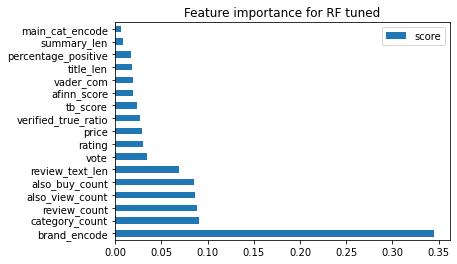

In [26]:
vals = list(X_train.columns.values)
keys = list(rf_tuned.feature_importances_)

impt = pd.DataFrame(data=keys, index=vals, columns=['score']).sort_values(by='score', ascending=False)
impt.plot(kind='barh', title='Feature importance for RF tuned')

<AxesSubplot:title={'center':'Feature importance for RF'}>

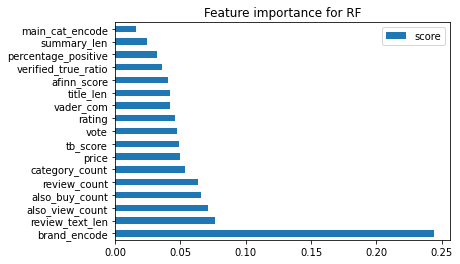

In [27]:
vals = list(X_train.columns.values)
keys_untuned = list(rf.feature_importances_)

impt_untuned = pd.DataFrame(data=keys_untuned, index=vals, columns=['score']).sort_values(by='score', ascending=False)
impt_untuned.plot(kind='barh', title='Feature importance for RF')

#### Identify 80% threshold
Afterwhich, we make a cumulative importance graph that shows the contribution to the overall importance of each additional variable. We used a dashed line to draw at 80% of total importance that is accounted for.

In [170]:
rf_tuned = RandomForestRegressor(bootstrap=True, max_depth=10, max_features='auto', min_samples_leaf=6, min_samples_split=30, n_estimators=550)

rf_tuned.fit(X_train, y_train)

# Saving feature names for later use
feature_list = list(X_train.columns)

In [207]:
# Get numerical feature importances
importances = list(rf_tuned.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: review_count         Importance: 0.27
Variable: verified_true_ratio  Importance: 0.21
Variable: also_buy_count       Importance: 0.14
Variable: category_count       Importance: 0.13
Variable: summary_len          Importance: 0.11
Variable: vote                 Importance: 0.09
Variable: rating               Importance: 0.03
Variable: title_len            Importance: 0.03



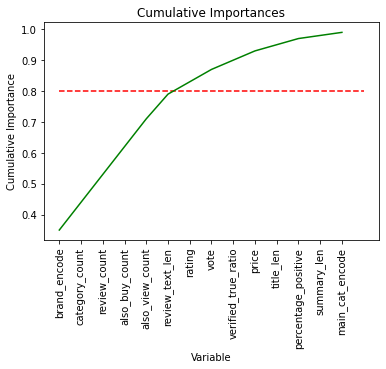

In [180]:
# list of x locations for plotting
x_values = list(range(len(importances)))

# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.80, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [197]:
# Find number of features for cumulative importance of 80%
# Add 1 because Python is zero-indexed
print('Number of features for 80% importance:', np.where(cumulative_importances > 0.80)[0][0] + 1)

Number of features for 80% importance: 8


Hence, we retrain the model with the new train and test set with only the 8 most important features, using the best parameter as well.

In [200]:
X_train_rf = X_train.loc[:,['main_cat_encode', 'summary_len', 'percentage_positive', 'title_len', 'price', 'verified_true_ratio', 'vote', 'rating']]
X_test_rf = X_test.loc[:,['main_cat_encode', 'summary_len', 'percentage_positive', 'title_len', 'price', 'verified_true_ratio', 'vote', 'rating']]

In [201]:
def model_performance_rf(models, model_names):
    #create empty df with col names
    df = pd.DataFrame(columns = ['Model', 'Train: Rsquare', 'Test: Rsquare', 'Train: MAE', 'Test: MAE', 'Train: RMSE', 'Test: RMSE', 'Train: MAPE', 'Test: MAPE'])
    
    for n, model in enumerate(models):
        model.fit(X_train_rf, y_train)
        #prepare values for model
        y_train_pred = model.predict(X_train_rf)
        y_pred = model.predict(X_test_rf)

        name = model_names[n] 
        rsquare_train = r2_score(y_train, y_train_pred)
        mae_train = mean_absolute_error(y_train, y_train_pred)
        rmse_train = math.sqrt(mean_squared_error(y_train, y_train_pred))
        
        rsquare_test = r2_score(y_test, y_pred)
        mae_test = mean_absolute_error(y_test, y_pred)
        rmse_test = math.sqrt(mean_squared_error(y_test, y_pred))
        
        mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
        mape_test = mean_absolute_percentage_error(y_test, y_pred)

        #append row to df
        df = df.append({'Model' 
                        : name, 'Train: Rsquare' : rsquare_train, 'Test: Rsquare' : rsquare_test, 'Train: MAE': mae_train, 'Test: MAE' : mae_test, 'Train: RMSE': rmse_train,
                         'Test: RMSE' : rmse_test, 'Train: MAPE': mape_train, 'Test: MAPE': mape_test}, 
                    ignore_index = True)
            
    return df.set_index('Model').transpose()

In [204]:
model_performance_rf([rf_tuned], ['random forest tuned w feature reduction'])

Model,random forest tuned w feature reduction
Train: Rsquare,0.449527
Test: Rsquare,0.239301
Train: MAE,1282.987496
Test: MAE,1494.313157
Train: RMSE,1524.005447
Test: RMSE,1772.739559
Train: MAPE,2.031517
Test: MAPE,2.352162


### XGBoost Regressor

In [44]:
import numpy as np
from xgboost import XGBRegressor
from xgboost import plot_importance

In [45]:
xgb = XGBRegressor()

xgb.fit(X_train, y_train)

model_performance([xgb],['XGBoost'])

Model,XGBoost
Train: Rsquare,0.875361
Test: Rsquare,0.363845
Train: MAE,544.020884
Test: MAE,1300.813084
Train: RMSE,725.180451
Test: RMSE,1621.138659
Train: MAPE,0.565682
Test: MAPE,1.306796


In [46]:
#Hyperparameters tuning
from sklearn.model_selection import GridSearchCV
xgb_params = {'max_depth': range(3,10,1), 
             'min_child_weight': range(1,8,2),
             'gamma':[i/10.0 for i in range(0,2)]
            }

pickle_name = "XGBRegressorGridSearch"

if pickle_name in os.listdir(directory):
    print('loadingData from directory instead of running')
    xgb_tuned = loadData(directory + pickle_name)
else:
    xgb_tuned = GridSearchCV(xgb, xgb_params, cv=5, n_jobs=-1)
    storeData(directory + pickle_name, xgb_tuned)
model_performance([xgb, xgb_tuned], ["xgb", "xgb_tuned"])

Model,xgb,xgb_tuned
Train: Rsquare,0.875361,0.609333
Test: Rsquare,0.363845,0.434931
Train: MAE,544.020884,1034.549079
Test: MAE,1300.813084,1231.252030
Train: RMSE,725.180451,1283.872198
Test: RMSE,1621.138659,1527.881156
Train: MAPE,0.565682,1.383192
Test: MAPE,1.306796,1.188445


In [47]:
xgb_tuned.fit(X_train,y_train)
print(xgb_tuned.best_params_)

{'gamma': 0.0, 'max_depth': 3, 'min_child_weight': 1}


In [81]:
xgb_params = {'max_depth': range(3,5,1), 
             'min_child_weight': range(1,4,2),
             'gamma':[i/10.0 for i in range(0,2)],
              'eta': [x * 0.1 for x in range(0, 1)],
}
eval_set = [(X_test, y_test)]
xgb_tuned2 = GridSearchCV(xgb, xgb_params, cv=5, n_jobs=-1)
xgb_tuned2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=0,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
      

In [82]:
print(xgb_tuned2.best_params_)

{'eta': 0.0, 'gamma': 0.0, 'max_depth': 3, 'min_child_weight': 1}


In [85]:
xgb_tuned = XGBRegressor(gamma=0.0, max_depth=3, min_child_weight=1, eta=0.0)

xgb_tuned.fit(X_train, y_train)
xgb_tuned.feature_importances_

array([0.04198203, 0.02157492, 0.04188859, 0.02459201, 0.38455075,
       0.        , 0.05360231, 0.        , 0.        , 0.03148622,
       0.05780935, 0.03461021, 0.28117427, 0.02672935], dtype=float32)

<AxesSubplot:>

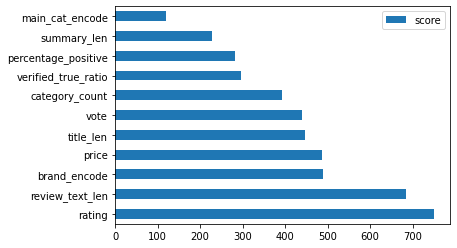

In [56]:
feature_important_weight = xgb.get_booster().get_score(importance_type='weight')
keys = list(feature_important_weight.keys())
values = list(feature_important_weight.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.plot(kind='barh')

In [68]:
xgb_tuned = XGBRegressor(gamma=0.0, max_depth=3, min_child_weight=1)
model_performance([xgb_tuned], ["xgb_tuned"])

Model,xgb_tuned
Train: Rsquare,0.609333
Test: Rsquare,0.434931
Train: MAE,1034.549079
Test: MAE,1231.252030
Train: RMSE,1283.872198
Test: RMSE,1527.881156
Train: MAPE,1.383192
Test: MAPE,1.188445


In [88]:
xgb_params = {'max_depth': range(1,5,1), 
             'min_child_weight': range(1,4,2),
             'gamma':[i/10.0 for i in range(0,2)],
              'eta': [x * 0.1 for x in range(0, 10)],
              'colsample_bytree': [x * 0.1 for x in range(0, 10)],
              'subsample': [x * 0.1 for x in range(0, 10)],
              
}
xgb_tuned2 = GridSearchCV(xgb, xgb_params, cv=5, n_jobs=-1)
xgb_tuned2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=0,
                                    num_parallel_...
             param_grid={'colsample_bytree': [0.0, 0.1, 0.2,
                                              0.30000000000000004, 0.4, 0.5,
                                              0.6000000000000001,
                                              0.7000000000000001, 0.8, 0.9],
          

In [91]:
print(xgb_tuned2.best_params_)

{'colsample_bytree': 0.4, 'eta': 0.0, 'gamma': 0.0, 'max_depth': 2, 'min_child_weight': 1, 'subsample': 0.8}


In [95]:
xgb_tuned3 = XGBRegressor(gamma=0.0, eta=0.0, min_child_weight=1, subsample=0.8, max_depth=2, colsample_bytree=0.4)

xgb_tuned3.fit(X_train, y_train)
xgb_tuned3.feature_importances_

array([0.0125404 , 0.01676589, 0.07997721, 0.        , 0.15703824,
       0.17387754, 0.06383262, 0.14411062, 0.14182836, 0.        ,
       0.05389229, 0.04300814, 0.11312865, 0.        ], dtype=float32)

<AxesSubplot:>

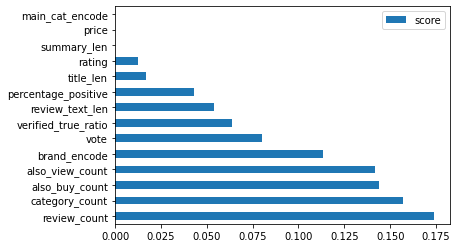

In [96]:
keys = list(X_train.columns.values)
values = list(xgb_tuned3.feature_importances_)

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.plot(kind='barh')

<AxesSubplot:>

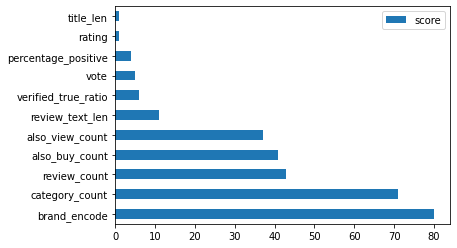

In [97]:
feature_important_weight = xgb_tuned3.get_booster().get_score(importance_type='weight')
keys = list(feature_important_weight.keys())
values = list(feature_important_weight.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.plot(kind='barh')

<AxesSubplot:>

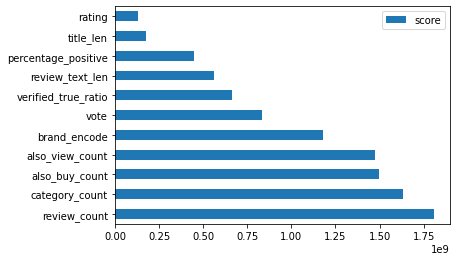

In [98]:
feature_important_gain = xgb_tuned3.get_booster().get_score(importance_type='gain')
keys = list(feature_important_gain.keys())
values = list(feature_important_gain.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.plot(kind='barh')

In [99]:
xgb_tuned = XGBRegressor(gamma=0.0, max_depth=3, min_child_weight=1)
model_performance([xgb_tuned, xgb_tuned3], ["xgb_tuned", "xgb_tuned_v2"])

Model,xgb_tuned,xgb_tuned_v2
Train: Rsquare,0.609333,-2.990496
Test: Rsquare,0.434931,-3.029257
Train: MAE,1034.549079,3552.140831
Test: MAE,1231.252030,3537.583662
Train: RMSE,1283.872198,4103.288003
Test: RMSE,1527.881156,4079.915256
Train: MAPE,1.383192,0.999328
Test: MAPE,1.188445,0.999356


### Lasso Regression

In [109]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train) 

Lasso()

In [209]:
from numpy import arange
from sklearn.linear_model import LassoCV

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
lasso_tune2 = LassoCV(alphas=arange(0, 1, 0.001), cv=cv, n_jobs=-1)
# fit model
lasso_tune2.fit(X_train, y_train)
# summarize chosen configuration
print('alpha: %f' % lasso_tune2.alpha_)

alpha: 0.999000


Hence the hyperparameter for Lasso Regression is alpha=0.999

### Ridge Regression

In [110]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

Ridge()

In [210]:
# use automatically configured the ridge regression algorithm
from numpy import arange
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
ridge_tune2 = RidgeCV(alphas=arange(0, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')
# fit model
ridge_tune2.fit(X_train, y_train)
# summarize chosen configuration
print('alpha: %f' % ridge_tune2.alpha_)

alpha = 0.010000


Hence the hyperparameter for Ridge Regression is alpha=0.01

In [211]:
lasso_reg_tuned = Lasso(alpha=0.999)
ridge_reg_tuned = Ridge(alpha=0.01)

In [212]:
model_performance([lasso_reg, lasso_reg_tuned, ridge_reg, ridge_reg_tuned], 
                  ['lasso', 'lasso_tuned', 'ridge', 'ridge_tuned'])

Model,lasso,lasso_tuned,ridge,ridge_tuned
Train: Rsquare,0.322803,0.322803,0.322806,0.322806
Test: Rsquare,0.309781,0.309781,0.309789,0.309790
Train: MAE,1410.253116,1410.252947,1410.098030,1410.093081
Test: MAE,1408.411736,1408.411580,1408.293814,1408.289869
Train: RMSE,1690.347772,1690.347768,1690.343595,1690.343593
Test: RMSE,1688.620375,1688.620344,1688.610926,1688.609723
Train: MAPE,2.425783,2.425783,2.426089,2.426100
Test: MAPE,2.660963,2.660964,2.662333,2.662342


### Ensemble Learning to combine Predictions

In [213]:
from tensorflow.keras.optimizers import Adam

def create_model(learning_rate = 0.01, activation = 'relu'):
  
    # Create an Adam optimizer with the given learning rate
    opt = Adam(lr=learning_rate)
  
    # Create your binary classification model  
    model = Sequential()
    model.add(Dense(15, 
                    activation = activation,
                    input_shape = (14, ),
                    activity_regularizer = regularizers.l2(1e-5)))
    model.add(Dropout(0.50))
    model.add(Dense(113440,
                    activation = activation, 
                    activity_regularizer = regularizers.l2(1e-5)))
    model.add(Dropout(0.50))
    model.add(Dense(1, activation = activation))
    # Compile the model
    model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
    return model

In [219]:
# List of best models

# DecisionTree
dtr_tuned = DecisionTreeRegressor(ccp_alpha=0.0,
 criterion='mse',
 max_depth= 6,
 max_features= None,
 max_leaf_nodes= 100,
 min_impurity_decrease= 0.0,
 min_impurity_split= None,
 min_samples_leaf= 40,
 min_samples_split= 10,
 min_weight_fraction_leaf= 0.0,
 random_state= None,
 splitter= 'best')

# Keras Regressor
nn_tuned = create_model()

# RF Regressor
rf_tuned = RandomForestRegressor(bootstrap=True, max_depth=10, max_features='auto', min_samples_leaf=6, min_samples_split=30, n_estimators=550)

# XGBoost Regressor
xgb_tuned = XGBRegressor(gamma=0.0, max_depth=3, min_child_weight=1)

# Lasso Regressor
lasso_tuned = Lasso()

# Ridge Regressor
ridge_tuned = Ridge()

In [227]:
from sklearn.linear_model import LinearRegression
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('dtr', dtr_tuned))
    level0.append(('nn', nn_tuned))
    level0.append(('rf', rf_tuned))
    level0.append(('xgb', xgb_tuned))
    level0.append(('lasso', lasso_tuned))
    level0.append(('ridge', ridge_tuned))
    # define meta learner model
    level1 = LinearRegression()
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

In [228]:
def get_models():
    models = dict()
    models['dtr'] = dtr_tuned
    models['nn'] = nn_tuned
    models['rf'] = rf_tuned
    models['xgb'] = xgb_tuned
    models['lasso'] = lasso_tuned
    models['ridge'] = ridge_tuned
    models['stacking'] = get_stacking()
    return models

In [233]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=2, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores

>dtr -1273.775 (30.078)
>rf -1220.749 (31.634)
>xgb -1224.499 (39.050)
>lasso -1415.343 (35.214)
>ridge -1415.253 (35.209)
>stacking -1221.927 (35.528)


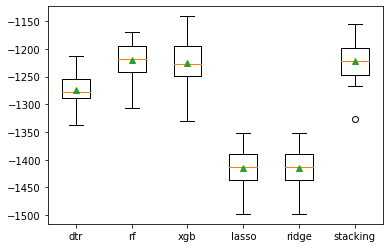

In [223]:
from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import mean
from numpy import std

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [224]:
# define the stacking ensemble
stack_models = get_stacking()
# fit the model on all available data
model_performance([stack_models], ['stack'])

Model,stack
Train: Rsquare,0.880531
Test: Rsquare,0.437982
Train: MAE,577.190072
Test: MAE,1229.712339
Train: RMSE,709.979599
Test: RMSE,1523.749501
Train: MAPE,0.785351
Test: MAPE,1.248692


### Additional Analysis (Using XGBoost)

To check on the influence of the sentiment variables, with and without.<br>
Note: using only baseline model as a basis of comparison.

In [246]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X, y, random_state=4222)

# drop sentiment
X_train_xgb.drop(columns=['percentage_positive'], inplace=True)
X_test_xgb.drop(columns=['percentage_positive'], inplace=True)

X_train_xgb[["rating", "title_len", "vote", "summary_len", "category_count","review_count","verified_true_ratio", "also_buy_count", "also_view_count", "price", "review_text_len"]] = scaler.fit_transform(X_train_xgb[["rating", "title_len", "vote", "summary_len", "category_count","review_count","verified_true_ratio", "also_buy_count", "also_view_count", "price", "review_text_len"]])
X_test_xgb[["rating", "title_len", "vote", "summary_len", "category_count","review_count","verified_true_ratio", "also_buy_count", "also_view_count", "price", "review_text_len"]] = scaler.transform(X_test_xgb[["rating", "title_len", "vote", "summary_len", "category_count","review_count","verified_true_ratio", "also_buy_count", "also_view_count", "price", "review_text_len"]])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-246-73e97760100b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_xgb[["rating", "title_len", "vote", "summary_len", "category_count","review_count","verified_true_ratio", "also_buy_count", "also_view_count", "price", "review_text_len"]] = scaler.fit_transform(X_train_xgb[["rating", "title_len", "vote", "summary_len", "category_count","review_count","verified_true_ratio

In [247]:
def model_performance_xgb_drop(models, model_names):
    #create empty df with col names
    df = pd.DataFrame(columns = ['Model', 'Train: Rsquare', 'Test: Rsquare', 'Train: MAE', 'Test: MAE', 'Train: RMSE', 'Test: RMSE', 'Train: MAPE', 'Test: MAPE'])
    
    for n, model in enumerate(models):
        model.fit(X_train_xgb, y_train_xgb)
        #prepare values for model
        y_train_pred = model.predict(X_train_xgb)
        y_pred = model.predict(X_test_xgb)

        name = model_names[n] 
        rsquare_train = r2_score(y_train_xgb, y_train_pred)
        mae_train = mean_absolute_error(y_train_xgb, y_train_pred)
        rmse_train = math.sqrt(mean_squared_error(y_train_xgb, y_train_pred))
        
        rsquare_test = r2_score(y_test_xgb, y_pred)
        mae_test = mean_absolute_error(y_test_xgb, y_pred)
        rmse_test = math.sqrt(mean_squared_error(y_test_xgb, y_pred))
        
        mape_train = mean_absolute_percentage_error(y_train_xgb, y_train_pred)
        mape_test = mean_absolute_percentage_error(y_test_xgb, y_pred)

        #append row to df
        df = df.append({'Model' 
                        : name, 'Train: Rsquare' : rsquare_train, 'Test: Rsquare' : rsquare_test, 'Train: MAE': mae_train, 'Test: MAE' : mae_test, 'Train: RMSE': rmse_train,
                         'Test: RMSE' : rmse_test, 'Train: MAPE': mape_train, 'Test: MAPE': mape_test}, 
                    ignore_index = True)
            
    return df.set_index('Model').transpose()

In [249]:
xgb_without = XGBRegressor(gamma=0.0, max_depth=3, min_child_weight=1)
model_performance_xgb_drop([xgb_without],['XGB wo sentiment'])

Model,XGB wo sentiment
Train: Rsquare,0.603158
Test: Rsquare,0.442685
Train: MAE,1043.053678
Test: MAE,1218.231263
Train: RMSE,1293.979398
Test: RMSE,1517.360791
Train: MAPE,1.368050
Test: MAPE,1.431095


In [250]:
### XGBoost Regression

model_performance([xgb_tuned],['XGB w sentiment'])

Model,XGB w sentiment
Train: Rsquare,0.609333
Test: Rsquare,0.434931
Train: MAE,1034.549079
Test: MAE,1231.252030
Train: RMSE,1283.872198
Test: RMSE,1527.881156
Train: MAPE,1.383192
Test: MAPE,1.188445
